# Ex02 - Resolução espacial e resolução radiométrica


1. **Entendendo a resolução espacial:** Reproduza as figuras dos slides 21 e 22 (Aula2.pdf). Use, no lugar da imagem da rosa, a imagem do cameraman.
2. **Entendendo a resolução radiométrica:** Visualize a imagem do cameraman em níveis de cinza e altere progressivamente a quantização (slide 30).
3. **Explorando diferentes espaços de cores:** Abra uma imagem colorida (use as imagens existentes no diretório *data*) e visualize as 3 bandas RGB. Converta para uma imagem em níveis de cinza usando vários métodos e encontre uma forma (quantitativa) de comparar as diversas imagens em níveis de cinza obtidas:
    - convert(L) do PIL;
    - médias das bandas R, G, B;
    - média ponderada das bandas R, G, B: procure qual a poderação mais utilizada;
4. **Retomando a geração de imagens sintéticas:** Faça um programa qualquer de geração de imagem a partir de uma equação. Utilize a função *indices* do Numpy

# Resolução 

## Item 1

### Importação das bibliotecas e verificação das informações da figura.

In [2]:
%matplotlib inline
#-*- coding: utf-8 -*- 
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt


img = Image.open('../data/cameraman.tif')

img.size, img.format, img.mode, type(img)


((256, 256), 'TIFF', 'L', PIL.TiffImagePlugin.TiffImageFile)

### Imprimindo a imagem original

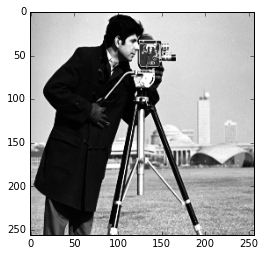

In [3]:
plt.imshow(img, cmap='gray')
plt.show()

### Usando o matplotlib para alterar a resolução espacial da imagem. Os parâmetros foram passados em polegadas.

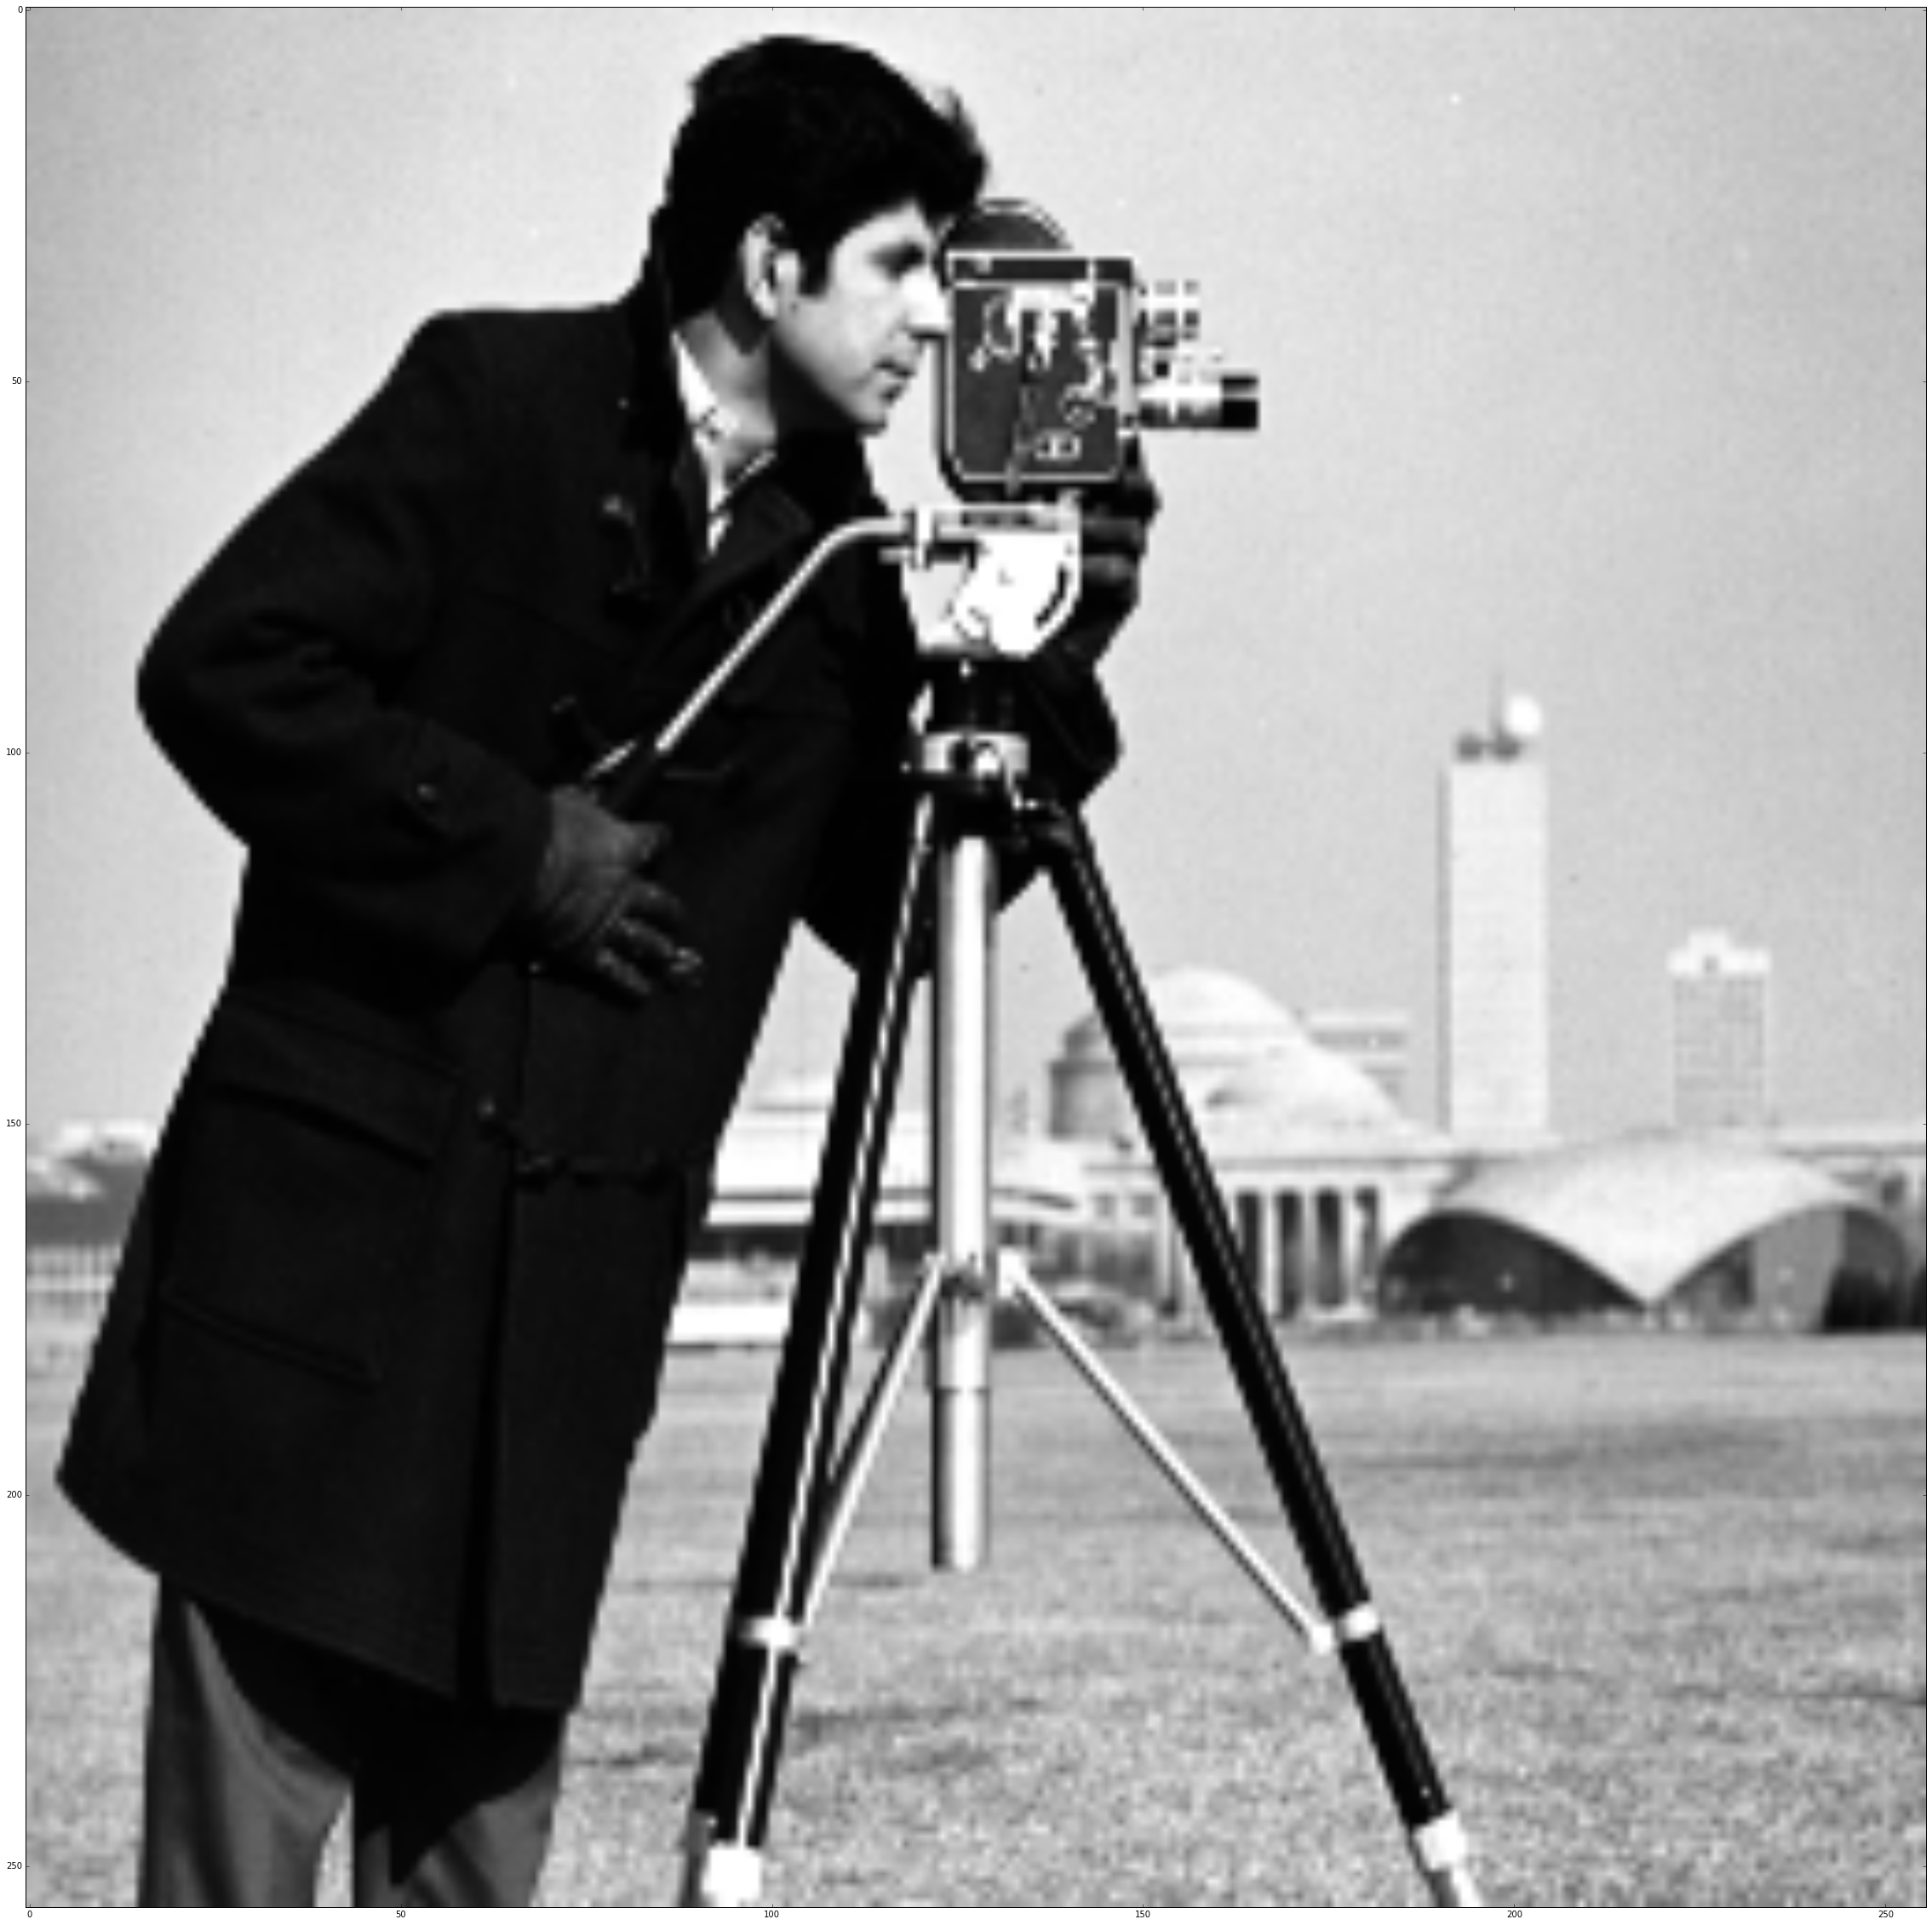

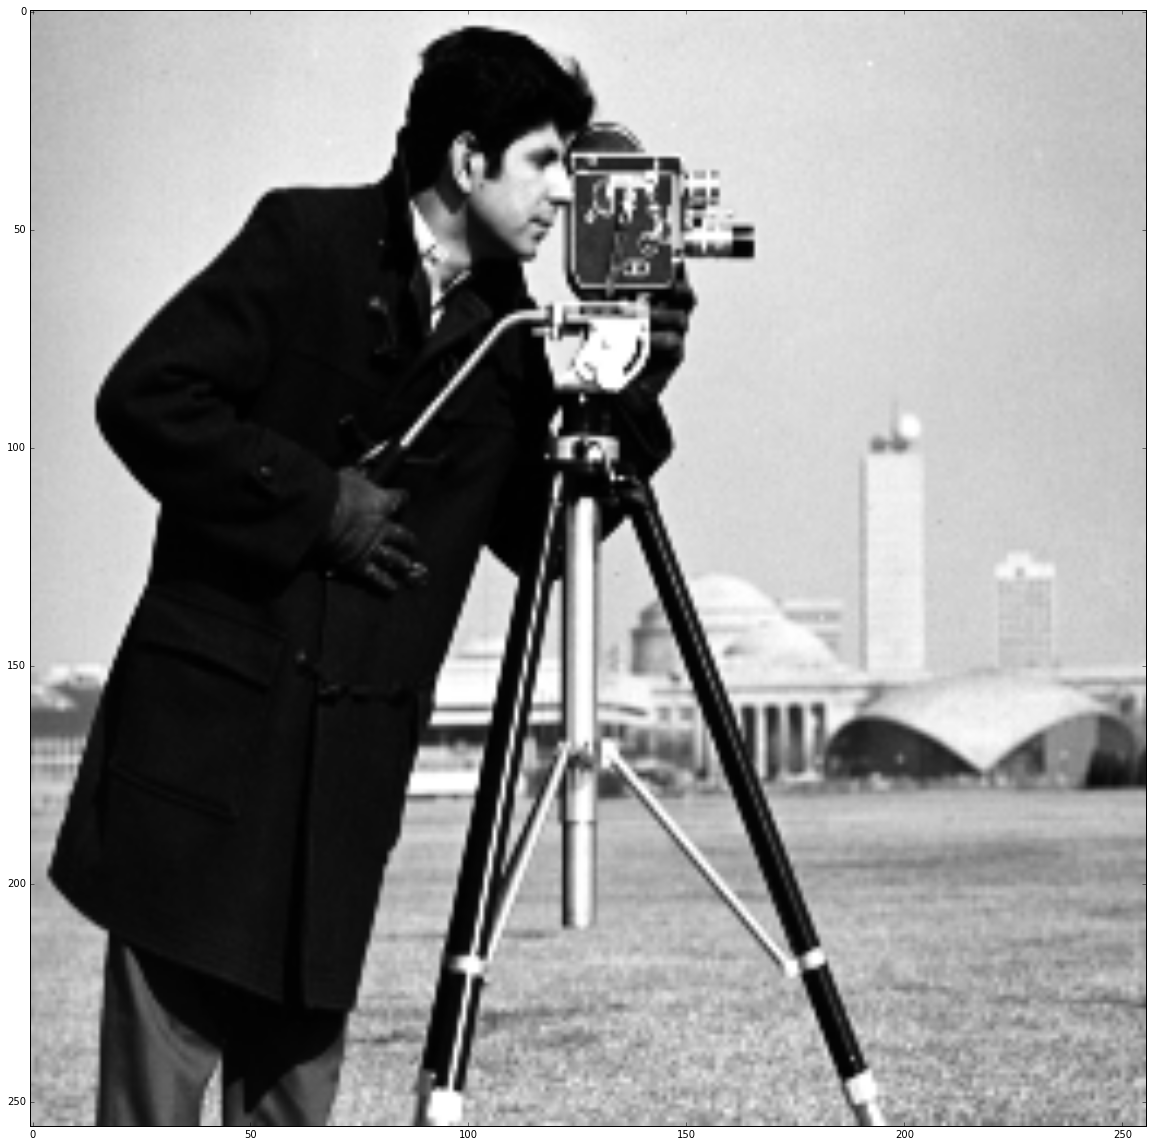

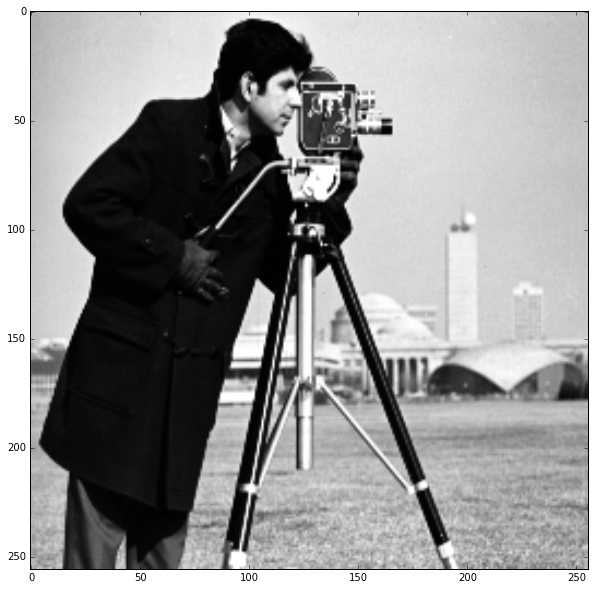

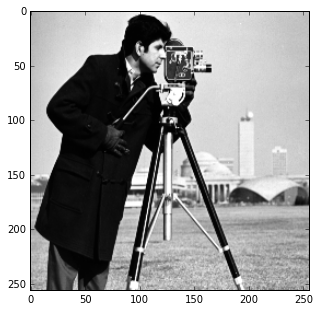

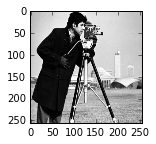

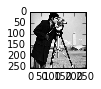

In [4]:
#img_np = np.array(img)
fs = [40, 20, 10, 5, 2, 1]

for i in fs:
    plt.figure(figsize=(i, i))
    #plt.title("Cameraman - fs=","%di",  fontsize=18)
    plt.imshow(img, cmap='gray')
    #plt.axis('off')
    plt.show()
    
    

### Agora, utilizaremos o Thumbnail da biblioteca PIL, o qual irá mudar a resolução espacial da imagem, porém presevará os aspectos originais. Obs.: o thumbnail não permite causar o efeito para imagens maiores do que a original.

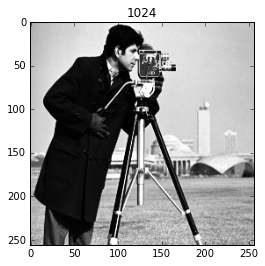

In [5]:
img.thumbnail((1024, 1024), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, cmap='gray')
plt.title("1024")
plt.show()


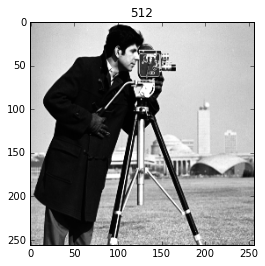

In [6]:
img.thumbnail((512, 512), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, cmap='gray')
plt.title("512")
plt.show()

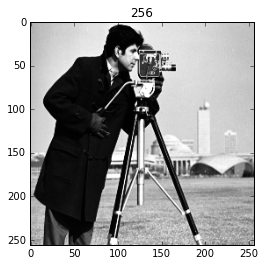

In [7]:
img.thumbnail((256, 256), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, cmap='gray')
plt.title("256")
plt.show()

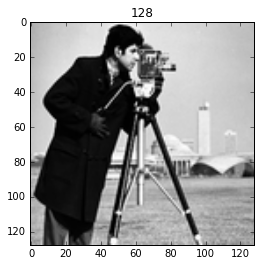

In [8]:
img.thumbnail((128, 128), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, cmap='gray')
plt.title("128")
plt.show()

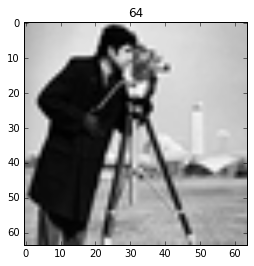

In [9]:
img.thumbnail((64, 64), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, cmap='gray')
plt.title("64")
plt.show()

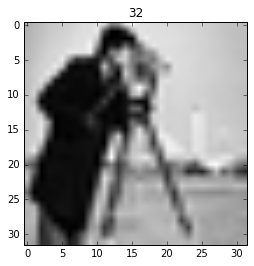

In [10]:
img.thumbnail((32, 32), Image.ANTIALIAS)  # resizes image in-place
imgplot = plt.imshow(img, cmap='gray')
plt.title("32")
plt.show()

## Item 2

#### Imagem original 8bits

(256, 256) TIFF L <class 'PIL.TiffImagePlugin.TiffImageFile'>


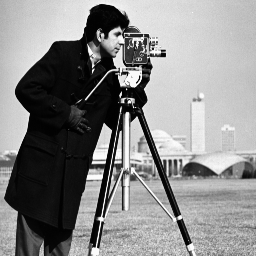

In [11]:
img = Image.open('../data/cameraman.tif')

print img.size, img.format, img.mode, type(img)
img

#### Imagem com profundidade de 4 bits

(256, 256) None P <class 'PIL.Image.Image'>


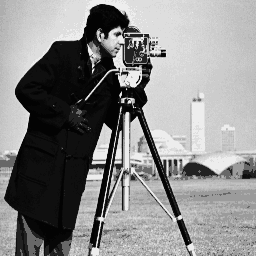

In [12]:
f4 = img.quantize(colors=16)
print f4.size, f4.format, f4.mode, type(f4)
f4

#### Imagem com profundidade  de 2 bits

(256, 256) None P <class 'PIL.Image.Image'>


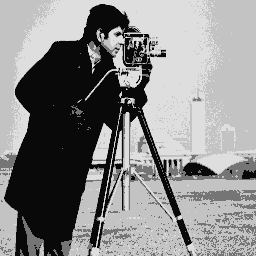

In [13]:
f2 = img.quantize(colors=4)
print f2.size, f2.format, f2.mode, type(f2)
f2

Na imagem a seguir podemos observar o efeito de inverter as cores, dizendo apenas que os valores serão menores que 128, utilizando tipo booleano.

In [15]:
#f_bin = f < 128
#print('Tipo do pixel:', f_bin.dtype)
#plt.imshow(f_bin,cmap='gray')
#plt.colorbar()

## Item 3

(256, 257) TIFF RGB


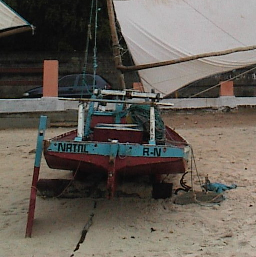

In [16]:
#img2 = Image.open('fala.png')
#print img2.size, img2.format, img2.mode
#img2

img = Image.open('boat.tif')

print img.size, img.format, img.mode
img

In [17]:
r,g,b = img.split()

L None (256, 257)


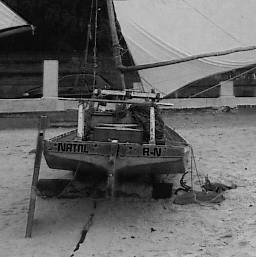

In [18]:
print r.mode, r.format, r.size
r

L None (256, 257)


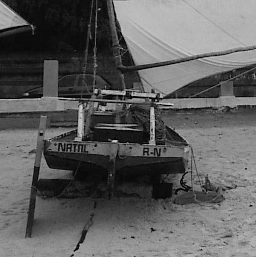

In [19]:
print g.mode, g.format, g.size
g


L None (256, 257)


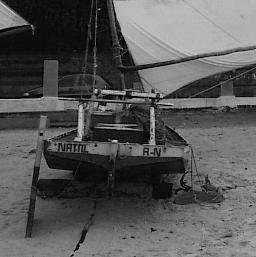

In [20]:
print b.mode, b.format, b.size
b

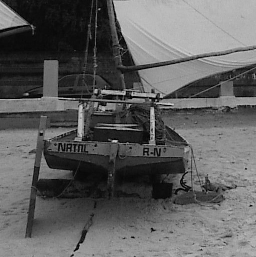

In [21]:
imgGray = Image.open('boat.tif').convert('L')
imgGray

In [28]:
rnp = np.array(r)
bnp = np.array(b)
gnp = np.array(g)

I = (rnp + bnp + gnp)/3

plt.imshow(I,cmap='gray')
plt.title('Media das bandas RGB')
plt.colorbar()
plt.show()

I2 = (rnp/3) + (bnp/3) + (gnp/3)

plt.imshow(I2,cmap='gray')
plt.title('Media das bandas RGB')
plt.colorbar()
plt.show()

ValueError: operands could not be broadcast together with shapes (150,180) (257,256) 

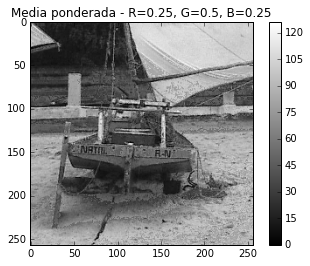

In [23]:
Ip = (2.5*rnp + 2.5*bnp + 5*gnp)/10
plt.imshow(Ip,cmap='gray')
plt.title('Media ponderada - R=0.25, G=0.5, B=0.25')
plt.colorbar()

O grau de luminosidade de uma cor significa quanto o olho humano pode perceber desta cor.  Pode ser calculado por:

                                Luminosidade = R*0.3 + G*0.59 + B *0.11

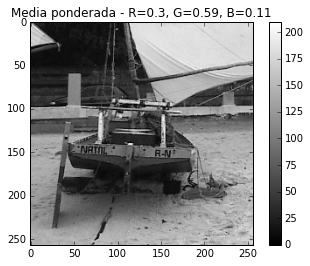

In [24]:
Ip2 = (0.3*rnp + 0.59*gnp + 0.11*bnp)
plt.imshow(Ip2,cmap='gray')
plt.title('Media ponderada - R=0.3, G=0.59, B=0.11')
plt.colorbar()

Como podemos observar, as imagens geradas apresentaram diferentes níveis de cinzas (com excessão da média das bandas RGB que obteve uma imagem distorcida), as quais não podemos afirmar que são melhores ou piores. Entretando, podemos dizer que algumas são mais perceptíveis em relação a diferenciar determinadas cores. A imagem gerada através da luminosidade (R=0.3, G=0.59, B=0.11) apresentou uma maior percepção das cores em relação as anteriores.


## Item 4

A imagem gerada a seguir, partiu da equação sinc, a qual é muito utilizada em filtros na area de processamento de sinais.

In [25]:
e = np.spacing(1) #valor pequeno para evitar a divisão por zeros
rows = np.linspace(-10.0, 10.0, 150) # coordenadas das linhas
cols = np.linspace(-12.0, 12.0, 180)
r, c = np.meshgrid(rows, cols, indexing='ij') #grid de coordenadas estilo numpy
z =  np.sin(r**2 + c**2 + e) / (r**2 + c**2 + e)

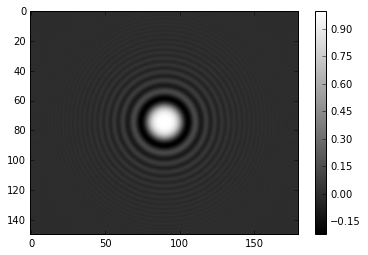

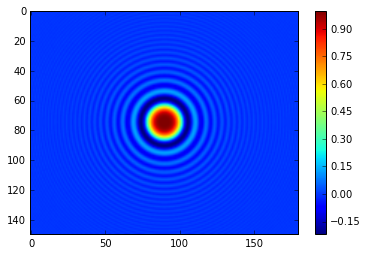

In [26]:
plt.imshow(z, cmap='gray')
plt.colorbar()
plt.show()

plt.imshow(z)
plt.colorbar()
plt.show()